<h1><center> Aula 11 - Floresta Aleatória</center></h1>

Na aula de prática de hoje iremos aprender a usar o método de aprendizagem de máquina chamado Floresta Aleatória (<i>Random Forest</i>). Floresta aleatórias é um dos algoritmos mais utilizados, devido à sua simplicidade e o fato de que pode ser utilizado para tarefas de classificação e também de regressão, que serão abordadas a seguir. 
<br><br>
Iremos utilizar novamente a <i>dataset</i> do <a href="https://drive.google.com/open?id=1bvQeIl0EUDW_UVTARilsTW3PLDuuhlxl"><b>Titanic</b></a> (em português) (<a href = "https://www.kaggle.com/c/titanic/data">dataset original - Kaggle</a>) . Primeiramente iremos fazer as devidas transformações nos dados, como seleção de <i>features</i>, remoção de valores nulos, e <i>"dummização"</i>. Depois, iremos separar o <i>dataset</i> em treino e teste. Em seguida, iremos os conceitos de Grid Search e Cross-validation para selecionar os melhores parametros para criar nossa floresta. Por fim, apresentaremos os resultados do nosso modelo e salvaremos o mesmo em um arquivo, para que possamos carregado-lo e utilizar a predição novamente, sem precisarmos criar o modelo do zero novamente.
<br><br>
Segue link do Sklearn para Floresta Aleatórias <a href = https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html> Random Forest </a>

<h1><b>LET'S CODE!!</b></h1>

In [0]:
# BIBLIOTECAS DATA SCIENCE
import pandas as pd
import numpy as np

# BIBLIOTECAS DE PLOT
import matplotlib.pyplot as plt 
import seaborn as sns

In [0]:
# FUNÇÕES UTEIS
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# MOSTRA RESULTADOS
def mostra_resultados(y, y_pred, classes, normalize=False,
                      title='Confusion matrix', cmap=plt.cm.coolwarm):

    # Calcular os resultados
    cm = confusion_matrix(y, y_pred)
    FP = cm.sum(axis=0) - np.diag(cm)  # Falso Positivos
    FN = cm.sum(axis=1) - np.diag(cm)  # Falso Negativos
    TP = np.diag(cm)                   # Verdadeiro Positivo
    TN = cm.sum() - (FP + FN + TP)     # Verdadeiro Negativos
    TPR = TP / (TP + FN)  # Revocação    
    PPV = TP / (TP + FP)  # Precisao
    F1 = 2 * ((PPV * TPR) / (PPV + TPR)) # F1 Score
    ACC = (TP + TN) / (TP + FP + FN + TN)  # Acurácia

    # Exibe resultados
    print("    Verdadeiros Positivos:{}".format(TP))
    print("    Verdadeiros Negativos:{}".format(TN))
    print("    Falso Positivo:{}".format(FP))
    print("    Falso Negativo:{}".format(FN))
    
    print("    Revocação:{}".format(TPR))    
    print("    Precisao:{}".format(PPV))
    
    print("    F1 Score:{}".format(F1))
    print("    Acuracia:{}".format(ACC))
    
    plot_confusion_matrix(cm, classes)    

In [0]:
# CARREGA BASE DO TITANIC
# ----------------------------------------------------------------------------------------------------- #
# OBS.: O TRECHO DE CÓDIGO ABAIXO SÓ É NECESSÁRIO REALIZAR SE ESTIVER USANDO O AMBIENTE DO GOOGLE COLAB
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
arquivo_base = "/content/drive/My Drive/titanic_ptbr.csv"
# ----------------------------------------------------------------------------------------------------- #

# arquivo_base = <caminho do arquivo>

# URL KAGGLE DA BASE: https://www.kaggle.com/c/titanic

# CARREGAR A BASE NO DATAFRAME
df = pd.read_csv(arquivo_base, sep=";", encoding="utf8")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df.head(3)

,id_passageiro,sobreviveu,tipo_classe,nome,sexo,idade,n_irmaos_abordo,n_pais_filhos_abordo,ticket,preco,cabine,local_embarque
0,1,não,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C
2,3,sim,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


**CAMPOS (FEATURES)**
* **id_passageiro** = ID do passageiro do navio (código primário).
* **sobreviveu** = Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero não sobreviveu.
* **tipo_classe** = Tipo de classe de passagem (Do 1 ao 3), sendo 1 a melhor classe e 3 a pior classe.
* **nome** = Nome do passageiro
* **sexo** = Gênero do passageiro, sendo masculino e feminino.
* **idade** = Idade do passageiro na data da ocorrência do naufrágio.
* **n_irmaos_abordo** = Número de irmãos / cônjuges a bordo.
* **n_pais_filhos_abordo** = Número de pais / filhos a bordo.
* **ticket** = Código do ticket.
* **preco** = Valor da passagem.
* **cabine** = Código de identificação da Cabine.
* **local_embarque** = Local onde o passageiro embarcou no navio.

In [0]:
# TRANSFORMANDO A FEATURE "sobreviveu" EM BINÁRIO, ONDE 'sim' = 1 e 'não' = 0
df["sobreviveu_mod"] = df["sobreviveu"].apply(lambda x: 1 if x == "sim" else 0)

In [0]:
# VALIDANDO TRANSFORMAÇÃO
df[["sobreviveu_mod", "sobreviveu"]].head(3)

,sobreviveu_mod,sobreviveu
0,0,não
1,1,sim
2,1,sim


In [0]:
# SOBREESCREVE A FEATURE 'sobreviveu'
df["sobreviveu"] = df["sobreviveu_mod"]

In [0]:
# PERCENTUAL DE ELEMENTOS NULOS
round(df.isnull().mean() * 100,2)

id_passageiro            0.00
sobreviveu               0.00
tipo_classe              0.00
nome                     0.00
sexo                     0.00
idade                   20.09
n_irmaos_abordo          0.00
n_pais_filhos_abordo     0.00
ticket                   0.00
preco                    0.08
cabine                  77.46
local_embarque           0.15
sobreviveu_mod           0.00
dtype: float64

In [0]:
df.head(2)

,id_passageiro,sobreviveu,tipo_classe,nome,sexo,idade,n_irmaos_abordo,n_pais_filhos_abordo,ticket,preco,cabine,local_embarque,sobreviveu_mod
0,1,0,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C,1


In [0]:
# SELECIONANDO FEATURES
features_importantes = ["sobreviveu", "tipo_classe", "sexo", "idade", 
                        "n_irmaos_abordo", "n_pais_filhos_abordo", "preco", "local_embarque"]
df = df[features_importantes]

In [0]:
# REMOVE ELEMENTOS NULOS
df = df.dropna()

In [0]:
# PERCENTUAL DE ELEMENTOS NULOS
round(df.isnull().mean() * 100,2)

sobreviveu              0.0
tipo_classe             0.0
sexo                    0.0
idade                   0.0
n_irmaos_abordo         0.0
n_pais_filhos_abordo    0.0
preco                   0.0
local_embarque          0.0
dtype: float64

In [0]:
df.head(3)

,sobreviveu,tipo_classe,sexo,idade,n_irmaos_abordo,n_pais_filhos_abordo,preco,local_embarque
0,0,3,homem,22.0,1,0,7.2500,S
1,1,1,mulher,38.0,1,0,71.2833,C
2,1,3,mulher,26.0,0,0,7.9250,S


In [0]:
# CRIAR A DUMMY PARA TRANSFORMAR OS DADOS CATEGÓRICOS EM NUMÉRICOS
features_categoricas = ["sexo", "local_embarque"]

dummy = pd.get_dummies(df, columns=features_categoricas)

In [0]:
# ESPIA A DUMMY
dummy

,sobreviveu,tipo_classe,idade,n_irmaos_abordo,n_pais_filhos_abordo,preco,sexo_homem,sexo_mulher,local_embarque_C,local_embarque_Q,local_embarque_S
0,0,3,22.0,1,0,7.2500,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1300,1,3,3.0,1,1,13.7750,0,1,0,0,1
1302,1,1,37.0,1,0,90.0000,0,1,0,1,0
1303,1,3,28.0,0,0,7.7750,0,1,0,0,1
1305,1,1,39.0,0,0,108.9000,0,1,1,0,0


In [0]:
# VERIFICA QUANTIDADE DE SOBREVIVENTES E NÃO SOBREVIVENTES (QUANTIDADE)
dummy["sobreviveu"].value_counts()

0    628
1    415
Name: sobreviveu, dtype: int64

In [0]:
# VERIFICA QUANTIDADE DE SOBREVIVENTES E NÃO SOBREVIVENTES (PERCENTUAL)
round(dummy["sobreviveu"].value_counts(normalize=True) * 100, 2)

0    60.21
1    39.79
Name: sobreviveu, dtype: float64

In [0]:
# ATRIBUINDO FEATURE RESPOSTA (TARGET/LABEL) EM y
y = dummy["sobreviveu"]

In [0]:
# ATRIBUINDO FEATURES A X (SEM TARGET/LABEL)
X = dummy.drop(columns="sobreviveu")

In [0]:
# SEPARANDO TREINO E TESTE
from sklearn.model_selection import train_test_split

test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [0]:
# TREINO COM RANDOM FOREST - Classificação (SEM GRID SEARCH E CROSS VALIDATION)
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# PREDIÇÃO TESTE
y_pred = modelo.predict(X_test)

In [0]:
# COMO FIZEMOS UMA CLASSIFICAÇÃO, O RESULTADO DA PREDIÇÃO SÃO VALORES BINÁRIOS 0s e 1s INDICANDO SE A PESSOA IRIA SOBREVIVER (1) OU NÃO (0)
y_pred

## RESULTADO DA PREDIÇÃO **SEM** *GRID SEARCH + CROSS VALIDATION*
ACURÁCIA = 0.80

    Verdadeiros Positivos:[172 104]
    Verdadeiros Negativos:[104 172]
    Falso Positivo:[40 29]
    Falso Negativo:[29 40]
    Revocação:[0.85572139 0.72222222]
    Precisao:[0.81132075 0.78195489]
    F1 Score:[0.83292978 0.75090253]
    Acuracia:[0.8 0.8]
Confusion matrix, without normalization


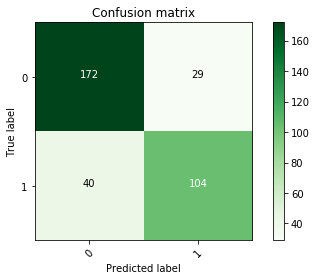

In [0]:
mostra_resultados(y_test, y_pred, modelo.classes_)

In [0]:
# AGORA FAREMOS O TREINAMENTO UTILIZANDO GRID SEARCH E CROSS VALIDATION PARA GERAR VARIOS MODELOS, 
# COM DIFERENTES PARAMETROS, AFIM DE ENCONTRAR UM MODELO MAIS EFICIENTE

# PARAMETROS DO GRID SEARCH CV
parametros_grid = {
    "n_estimators": [10, 50, 100, 200, 400],
    "max_depth": [5, 10, 20, 40],
    "max_features": ["auto"],
    "bootstrap": [True],
}

# QUANTIDADE DE FOLDS 
n_cross_validation = 5

In [0]:
# TREINO COM GRID SEARCH CV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# USAR "ACURÁCIA" COMO CRITÉRIO PARA ENCONTRAR O MELHOR MODELO
criterio = "accuracy"

modelo = GridSearchCV(RandomForestClassifier(),
                      param_grid=parametros_grid, cv=n_cross_validation, verbose=10, scoring=criterio)

In [0]:
# APLICANDO O TREINO
modelo.fit(X_train, y_train)

In [0]:
# EXTRAINDO O MELHOR MODELO
melhor_modelo = modelo.best_estimator_

In [0]:
# PREDIÇÃO TESTE
y_pred = melhor_modelo.predict(X_test)

## RESULTADO DA PREDIÇÃO **COM** *GRID SEARCH + CROSS VALIDATION*
ACURÁCIA = ~0.85

    Verdadeiros Positivos:[193 103]
    Verdadeiros Negativos:[103 193]
    Falso Positivo:[31 18]
    Falso Negativo:[18 31]
    Revocação:[0.91469194 0.76865672]
    Precisao:[0.86160714 0.85123967]
    F1 Score:[0.88735632 0.80784314]
    Acuracia:[0.85797101 0.85797101]
Confusion matrix, without normalization


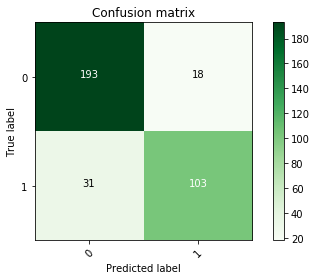

In [0]:
mostra_resultados(y_test, y_pred, melhor_modelo.classes_)

## CONCLUSÃO:

Quando fizemos o modelo sem usar o **Grid Search** e **Cross Validation**, a acurácia foi de **0,80**. Quando aplicamos o método de **Grid Search** e **Cross Validation**, apesar de gastarmos mais tempo de processamento, temos a oportunidade de encontrar modelos melhores, conforme resultado acima, onde acurácia foi de **~0,85**.

## **RANDOM FOREST REGRESSOR**

Podemos realizar um treinamento utilizando regressão logístitica afim de prever a chance de sobrevivência, invez de uma classificação binária, onde 1 = "Sobrevive" e 0 = "Não sobrevive"

In [0]:
# SEPARANDO TREINO E TESTE
from sklearn.model_selection import train_test_split

test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [0]:
# TREINO COM RANDOM FOREST - Regressão (SEM GRID SEARCH E CROSS VALIDATION)
from sklearn.ensemble import RandomForestRegressor

modelo_reg = RandomForestRegressor()
modelo_reg.fit(X_train, y_train)

In [0]:
# PREDIÇÃO TESTE
y_pred = modelo_reg.predict(X_test)

In [61]:
# COMO FIZEMOS UMA REGRESSÃO, O RESULTADO DA PREDIÇÃO SÃO VALORES DECIMAIS, QUE INDICAM A CHANCE DE SOBREVIVÊNCIA, VARIANDO DE 1 (SOBREVIVE) ATÉ 0 (NÃO SOBREVIVE)
y_pred

array([1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.1       , 1.        , 0.9       ,
       0.9       , 1.        , 1.        , 0.1       , 1.        ,
       1.        , 0.1       , 0.        , 0.9       , 0.9       ,
       0.6       , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.46666667, 1.        , 0.7       , 0.9       ,
       0.1       , 0.2       , 0.        , 1.        , 0.7       ,
       0.4       , 0.7       , 1.        , 1.        , 0.        ,
       0.3       , 1.        , 0.1       , 0.        , 0.1       ,
       0.38333333, 0.8       , 0.5       , 0.4       , 0.1       ,
       0.5       , 0.7       , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.13333333, 1.        ,
       1.        , 0.7       , 0.        , 0.40666667, 0.1       ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.2       , 0.7       , 0.        , 0.2    

In [0]:
# QUANDO USAMOS REGRESSÃO, É IMPORTANTE ARRENDODARMOS O RESULTADO PREDITO (y_pred), UTILIZANDO A FUNÇÃO round:
y_pred_arredondado = y_pred.round()

In [79]:
# ESTE PROCEDIMENTO É NECESÁRIO PARA REALIZAR O TESTE, UMA VEZ QUE y_test POSSUI VALORES 0s E 1s
y_test.to_numpy()

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

In [78]:
y_pred_arredondado

array([1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 1.

    Verdadeiros Positivos:[171 108]
    Verdadeiros Negativos:[108 171]
    Falso Positivo:[36 30]
    Falso Negativo:[30 36]
    Revocação:[0.85074627 0.75      ]
    Precisao:[0.82608696 0.7826087 ]
    F1 Score:[0.83823529 0.76595745]
    Acuracia:[0.80869565 0.80869565]
Confusion matrix, without normalization


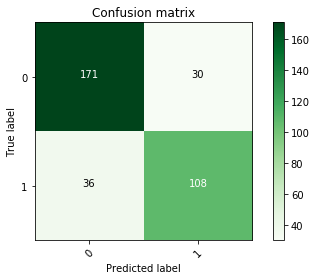

In [81]:
mostra_resultados(y_test, y_pred_arredondado, modelo.classes_)

Para finalizar, podemos usar o módulo **pickle** para salvar o modelo. O **pickle** é utilizado para gravar qualquer objeto Python em um arquivo, com isso, podemos carregar o modelo novamente sem a necessidade de refazer o treinamento.

In [0]:
import pickle

# SALVANDO O MODELO
arquivo_modelo = "melhor_modelo.pkl"
pickle.dump(melhor_modelo, open(arquivo_modelo, "wb"))

In [0]:
# CARREGANDO O MODELO
arquivo_modelo = "melhor_modelo.pkl"
melhor_modelo = pickle.load(open(arquivo_modelo, "wb"))